This notebook demonstrates the process of implementing logistic regression from scratch using gradient descent.
The dataset used is the Wine Dataset from the UCI Machine Learning Repository. This dataset contains the results of
a chemical analysis of wines grown in the same region in Italy by three different cultivators. There are 13 different
measurements taken for different constituents found in the three types of wine.

We will be focusing on using 'alcohol' and 'ash' as features to predict the 'class' of the wine.
However, the implementation will be generalizable to use any number of features.

In [6]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


In [7]:
%autosave 5 # did work before...??? - Javascript Error: IPython is not defined

Autosaving every 5 seconds


First, we will load the wine dataset using Pandas, selecting 'alcohol' and 'ash' as our features and 'class' as our target.


In [8]:
# Load dataset

df = pd.read_csv('wine_data.txt')
print(df.head())




   class  alcohol  malic_acid   ash  alcalinity  magnesium  total_phenols  \
0      1    14.23        1.71  2.43        15.6        127           2.80   
1      1    13.20        1.78  2.14        11.2        100           2.65   
2      1    13.16        2.36  2.67        18.6        101           2.80   
3      1    14.37        1.95  2.50        16.8        113           3.85   
4      1    13.24        2.59  2.87        21.0        118           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color   hue    od  \
0        3.06                  0.28             2.29   5.64  1.04  3.92   
1        2.76                  0.26             1.28   4.38  1.05  3.40   
2        3.24                  0.30             2.81   5.68  1.03  3.17   
3        3.49                  0.24             2.18   7.80  0.86  3.45   
4        2.69                  0.39             1.82   4.32  1.04  2.93   

   proline  
0     1065  
1     1050  
2     1185  
3     1480  
4      735  


In [16]:
# Separate features and target
X = df[['alcohol', 'ash']].values
y = df['class'].values

# Convert class labels to binary (class 1 vs others class)
y = (y == 1).astype(int) # 1 ff class = 1

In [17]:
print(X)

[[14.23  2.43]
 [13.2   2.14]
 [13.16  2.67]
 [14.37  2.5 ]
 [13.24  2.87]
 [14.2   2.45]
 [14.39  2.45]
 [14.06  2.61]
 [14.83  2.17]
 [13.86  2.27]
 [14.1   2.3 ]
 [14.12  2.32]
 [13.75  2.41]
 [14.75  2.39]
 [14.38  2.38]
 [13.63  2.7 ]
 [14.3   2.72]
 [13.83  2.62]
 [14.19  2.48]
 [13.64  2.56]
 [14.06  2.28]
 [12.93  2.65]
 [13.71  2.36]
 [12.85  2.52]
 [13.5   2.61]
 [13.05  3.22]
 [13.39  2.62]
 [13.3   2.14]
 [13.87  2.8 ]
 [14.02  2.21]
 [13.73  2.7 ]
 [13.58  2.36]
 [13.68  2.36]
 [13.76  2.7 ]
 [13.51  2.65]
 [13.48  2.41]
 [13.28  2.84]
 [13.05  2.55]
 [13.07  2.1 ]
 [14.22  2.51]
 [13.56  2.31]
 [13.41  2.12]
 [13.88  2.59]
 [13.24  2.29]
 [13.05  2.1 ]
 [14.21  2.44]
 [14.38  2.28]
 [13.9   2.12]
 [14.1   2.4 ]
 [13.94  2.27]
 [13.05  2.04]
 [13.83  2.6 ]
 [13.82  2.42]
 [13.77  2.68]
 [13.74  2.25]
 [13.56  2.46]
 [14.22  2.3 ]
 [13.29  2.68]
 [13.72  2.5 ]
 [12.37  1.36]
 [12.33  2.28]
 [12.64  2.02]
 [13.67  1.92]
 [12.37  2.16]
 [12.17  2.53]
 [12.37  2.56]
 [13.11  1

In [20]:
# Add intercept term --> a '1' to be multiplied by the constant, it is not the intercept itself...
X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)
# probably sklearn needs this format...

In [13]:
print(X)

[[ 1.   14.23  2.43]
 [ 1.   13.2   2.14]
 [ 1.   13.16  2.67]
 [ 1.   14.37  2.5 ]
 [ 1.   13.24  2.87]
 [ 1.   14.2   2.45]
 [ 1.   14.39  2.45]
 [ 1.   14.06  2.61]
 [ 1.   14.83  2.17]
 [ 1.   13.86  2.27]
 [ 1.   14.1   2.3 ]
 [ 1.   14.12  2.32]
 [ 1.   13.75  2.41]
 [ 1.   14.75  2.39]
 [ 1.   14.38  2.38]
 [ 1.   13.63  2.7 ]
 [ 1.   14.3   2.72]
 [ 1.   13.83  2.62]
 [ 1.   14.19  2.48]
 [ 1.   13.64  2.56]
 [ 1.   14.06  2.28]
 [ 1.   12.93  2.65]
 [ 1.   13.71  2.36]
 [ 1.   12.85  2.52]
 [ 1.   13.5   2.61]
 [ 1.   13.05  3.22]
 [ 1.   13.39  2.62]
 [ 1.   13.3   2.14]
 [ 1.   13.87  2.8 ]
 [ 1.   14.02  2.21]
 [ 1.   13.73  2.7 ]
 [ 1.   13.58  2.36]
 [ 1.   13.68  2.36]
 [ 1.   13.76  2.7 ]
 [ 1.   13.51  2.65]
 [ 1.   13.48  2.41]
 [ 1.   13.28  2.84]
 [ 1.   13.05  2.55]
 [ 1.   13.07  2.1 ]
 [ 1.   14.22  2.51]
 [ 1.   13.56  2.31]
 [ 1.   13.41  2.12]
 [ 1.   13.88  2.59]
 [ 1.   13.24  2.29]
 [ 1.   13.05  2.1 ]
 [ 1.   14.21  2.44]
 [ 1.   14.38  2.28]
 [ 1.   13.9 

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

With our data loaded, we now define the necessary functions for logistic regression:

- **Sigmoid Function**: This function maps any real-valued number into the range of 0 to 1, which is useful when our outcome is binary.

- **Cost Function**: Also known as the log-loss or binary cross-entropy loss, measures the performance of our model. It quantifies the difference between the predicted values and the actual values.

- **Gradient Function**: This computes the gradient of the cost function. The gradient is used to update the parameters.

- **Gradient Descent Function**: This function iteratively adjusts the parameters to minimize the cost function.

- **Prediction Function**: Generates predictions based on learned model parameters by applying a threshold of 0.5.
"""

In [22]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))



In [23]:
X_with_intercept = np.insert(X, 0, 1, axis=1)
print(X_with_intercept) 
# warum 3 Spalten? woher kommt die 3?
# warum brauchen wir noch mehr intercept terms, wir hatten doch schon eine 1er Spalte?

[[ 1.    1.    1.    1.   14.23  2.43]
 [ 1.    1.    1.    1.   13.2   2.14]
 [ 1.    1.    1.    1.   13.16  2.67]
 ...
 [ 1.    1.    1.    1.   13.27  2.26]
 [ 1.    1.    1.    1.   13.17  2.37]
 [ 1.    1.    1.    1.   14.13  2.74]]


In [24]:
from scipy.optimize import fmin_tnc
from sklearn import metrics

# Define the logistic regression cost function. Note that we use vectorization, and theta includes theta_0, theta_1, etc.
def log_reg_cost_function(theta, X, y): # 'dot'? because they are vectors
    m = X.shape[0]  # number of training examples
    h = sigmoid(X.dot(theta))
    cost = (-1 / m) * (y.T.dot(np.log(h)) + (1 - y).T.dot(np.log(1 - h)))
    return cost

# Define the gradient of the logistic regression cost function
def log_reg_gradient_function(theta, X, y):
    m = X.shape[0]  # number of training examples
    h = sigmoid(X.dot(theta))
    gradient = (1 / m) * (X.T.dot(h - y))
    return gradient

# Define the function to train logistic regression model
def log_reg_train_function(X, y):
    # Add intercept term to X
    X_with_intercept = np.insert(X, 0, 1, axis=1)
    # Initial theta is 0 (n+1) dimensions, where n is number of features
    initial_theta = np.zeros(X_with_intercept.shape[1])
    # Optimize the cost function (note that we use a solver, or optimizer, called fmin_tnc)
    theta, _, _ = fmin_tnc(func=log_reg_cost_function, x0=initial_theta,
                            fprime=log_reg_gradient_function, args=(X_with_intercept, y))
    return theta

In [26]:
# Train the model using the defined function
theta = log_reg_train_function(X_train, y_train)

print(theta) # 6 thetas..., denn n = 5??? yes there are 5 classes

[-9.74791256 -9.74791256 -9.74791256 -9.74791256  2.64421948  1.39100953]


  NIT   NF   F                       GTG
    0    1  6.931471805599452E-01   3.29511241E+00
tnc: stepmx = 1000
    1    5  4.306114914056288E-01   2.76363664E-01
    2   12  3.848354367695200E-01   2.01040634E-04
tnc: fscale = 70.5274
    3   16  3.817481541217297E-01   1.01690062E-04
    4   20  3.816257216765258E-01   3.07063295E-07
tnc: fscale = 1804.62
    5   24  3.816255939147631E-01   6.21676646E-10
tnc: fscale = 40106.8
tnc: |fn-fn-1] = 1.35311e-11 -> convergence
    6   27  3.816255939012320E-01   5.68466110E-16
tnc: Converged (|f_n-f_(n-1)| ~= 0)


In [27]:
# Make predictions on the test set by using the optimal theta resulting from running gradient descent on the cost gradients
X_test_with_intercept = np.insert(X_test, 0, 1, axis=1)
y_pred = (sigmoid(X_test_with_intercept.dot(theta)) >= 0.5).astype(int) # add a threshhold in order to get a predicted class instead of a distribution

# Calculate performance metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = metrics.recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = metrics.f1_score(y_test, y_pred, average='weighted', zero_division=1)
cm = metrics.confusion_matrix(y_test, y_pred)

accuracy, precision, recall, f1, cm

(0.8222222222222222,
 0.8325925925925927,
 0.8222222222222222,
 0.8257040450588838,
 array([[27,  5],
        [ 3, 10]]))

Before training our model, let's visualize the data. We will plot the two features on a scatter plot, 
color-coding them by their respective class labels.

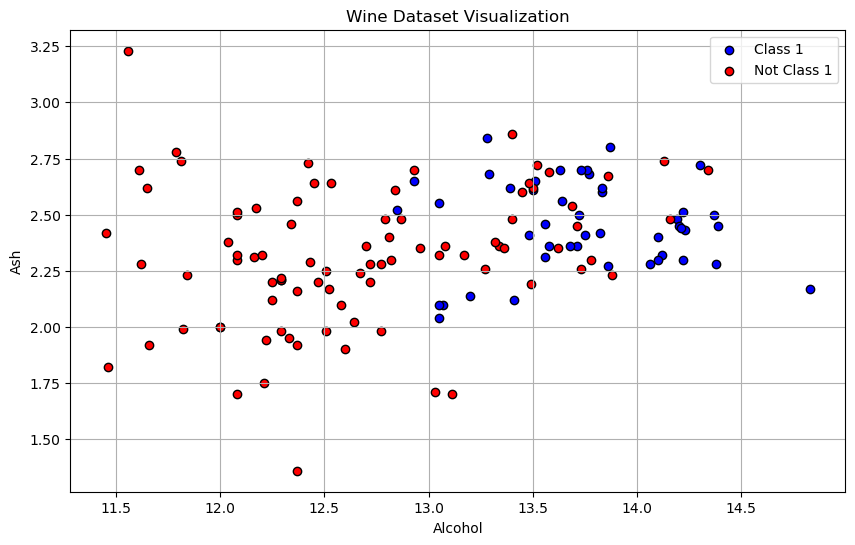

In [30]:
def plot_data(X, y, labels):
    plt.figure(figsize=(10, 6))
    plt.scatter(X[y == 1, 1], X[y == 1, 2], color='blue', label=labels[0], edgecolors='k')
    plt.scatter(X[y == 0, 1], X[y == 0, 2], color='red', label=labels[1], edgecolors='k')
    
    plt.xlabel('Alcohol')
    plt.ylabel('Ash')
    plt.legend()
    plt.grid(True)
    plt.title('Wine Dataset Visualization')
    plt.show()

plot_data(X_train, y_train, labels=['Class 1', 'Not Class 1'])

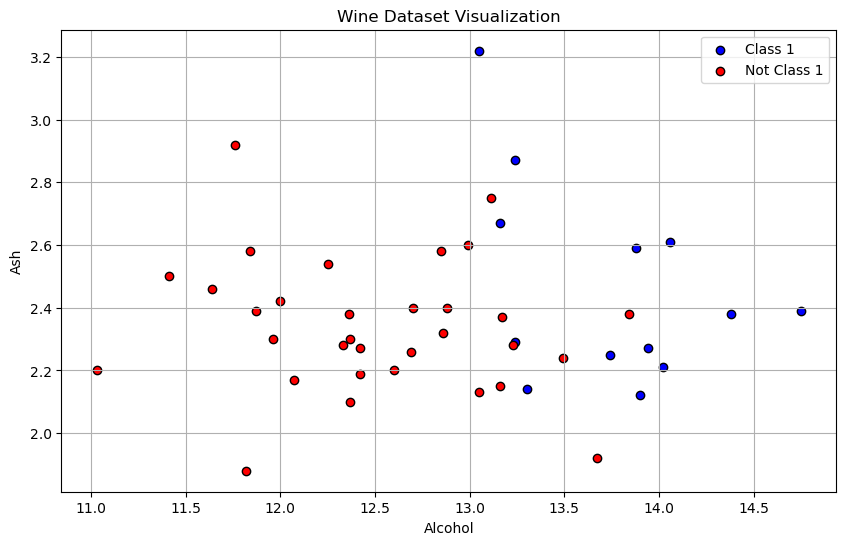

Text(0.5, 1.0, 'wrong predictions')

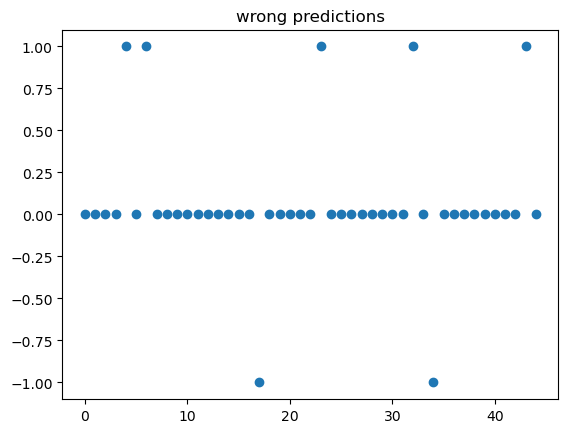

In [31]:
plot_data(X_test, y_test, labels=['Class 1', 'Not Class 1'])


plt.plot(y_test-y_pred,'o')
plt.title('wrong predictions')



How can the model be improved? An easy way would be to add more features. Try this and report the accuracy.

In [ ]:
# these are the residuals, != 0 means error

In [ ]:
X = df[['alcohol', 'ash', 'flavanoids', 'alcalinity']].values
# if you have no idea, just add everythin oder make a loop where you add iteratively

# look again at the confusion matrix
# more features helped a lot
# maybe with more features it would get worse, try it out,
# for sure it the parameters are not predictive...

# if you make a resampling, so do not use the same splitting every time, the variation could also come from this.
# so if you compare the effect of different features, make sure to use the sampling